<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_12_2_genetic_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema del control de paridad uniforme


In [ ]:
pip install deap

###Configuraciones y definiciones

In [ ]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools
from deap import gp

import random as rd
import numpy as np
import operator as op

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import matplotlib.pyplot as plt
import networkx as nx

import elitism


In [ ]:
# Constantes del problema:

NUM_INPUTS = 3   # Numero de entradas
NUM_COMBINATIONS = 2 ** NUM_INPUTS   # Numero de combinaciones

In [ ]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 60     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.5    # Probabilidad de mutación

MAX_GENERATIONS = 20    # Maximo numero de generaciones (condición de termino)

In [ ]:
HALL_OF_FAME_SIZE = 10

In [ ]:
# Constantes especificas de la progrmacion genetica:
MIN_TREE_HEIGHT = 3
MAX_TREE_HEIGHT = 5
LIMIT_TREE_HEIGHT = 17
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 2

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [ ]:
toolbox = base.Toolbox()

In [ ]:
## Paso 4: Declarando el cromosoma


# calculate the truth table of even parity check:
parityIn = list(itertools.product([0, 1], repeat=NUM_INPUTS))
parityOut = []
for row in parityIn:
    parityOut.append(sum(row) % 2)

# create the primitive set:
primitiveSet = gp.PrimitiveSet("main", NUM_INPUTS, "in_")
primitiveSet.addPrimitive(op.and_, 2)
primitiveSet.addPrimitive(op.or_, 2)
primitiveSet.addPrimitive(op.xor, 2)
primitiveSet.addPrimitive(op.not_, 1)

# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

In [ ]:
parityIn

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
parityOut

[0, 1, 1, 0, 1, 0, 0, 1]

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

{0: Text(0.027157101360935895, -0.004925880423161041, 'and_'),
 1: Text(-0.10689610191616201, -0.13964584596319726, 'and_'),
 2: Text(0.10566668483858922, -0.37787152654434397, 'xor'),
 3: Text(0.2649381010274332, -0.6235366351246148, 'or_'),
 4: Text(0.2998632896844238, -0.8259818706907988, 'or_'),
 5: Text(0.28426824589628585, -0.9556697897019959, 'in_1'),
 6: Text(0.36130073216893444, -0.9431775008179386, 'in_0'),
 7: Text(0.4350103607268952, -0.7415426506245726, 'and_'),
 8: Text(0.5581995987512461, -0.789508907942092, '0'),
 9: Text(0.5141654237132695, -0.8529423845201312, '1'),
 10: Text(0.22040568295587018, -0.3199984592054476, 'and_'),
 11: Text(0.07189123368988415, -0.30338992978031354, 'and_'),
 12: Text(-0.03413160195417984, -0.25543354553799513, 'in_0'),
 13: Text(-0.03072008362192804, -0.33840072635511786, 'in_1'),
 14: Text(0.38987389569809905, -0.28523412667740494, 'or_'),
 15: Text(0.5002175166396431, -0.2457862793367435, '0'),
 16: Text(0.4997734031208294, -0.329380595

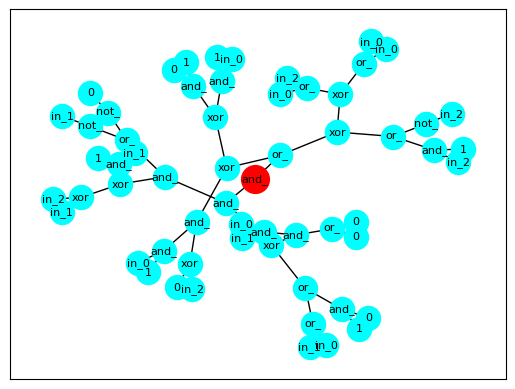

In [ ]:
  nodes, edges, labels = gp.graph(toolbox.individualCreator())
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)

  nx.draw_networkx_nodes(g, pos, node_color='cyan')
  nx.draw_networkx_nodes(g, pos, nodelist=[0], node_color='red', node_size=400)

  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, **{"labels": labels, "font_size": 8})

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
# Crear un operador para compilar el arbol primitivo en el codigo de python

toolbox.register("compile", gp.compile, pset=primitiveSet)

In [ ]:
## Paso 9: Definir función para calcular la aptitud

def parityError(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn, parityOut))

# fitness measure:
def getCost(individual):
    return parityError(individual) + individual.height / 100, # return a tuple

In [ ]:
getCost(toolbox.individualCreator())

(4.03,)

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", getCost)

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

In [ ]:
# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=op.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=op.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

###Evolucionando la solución

In [ ]:
def parity_problem():
  # create initial population (generation 0):
  population = toolbox.populationCreator(n=POPULATION_SIZE)

  # prepare the statistics object:
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("min", np.min)
  stats.register("avg", np.mean)

  # define the hall-of-fame object:
  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  # perform the Genetic Algorithm flow with elitism:
  population, logbook = elitism.eaSimpleWithElitism(population,
                                                    toolbox,
                                                    cxpb=P_CROSSOVER,
                                                    mutpb=P_MUTATION,
                                                    ngen=MAX_GENERATIONS,
                                                    stats=stats,
                                                    halloffame=hof,
                                                    verbose=True)

  # print info for best solution found:
  best = hof.items[0]
  print("-- Best Individual = ", best)
  print("-- length={}, height={}".format(len(best), best.height))
  print("-- Best Fitness = ", best.fitness.values[0])
  print("-- Best Parity Error = ", parityError(best))

  # plot best tree:
  nodes, edges, labels = gp.graph(best)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.spring_layout(g)

  nx.draw_networkx_nodes(g, pos, node_color='cyan')
  nx.draw_networkx_nodes(g, pos, nodelist=[0], node_color='red', node_size=400)

  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, **{"labels": labels, "font_size": 8})


  plt.show()

gen	nevals	min 	avg   
0  	60    	2.03	3.9565
1  	49    	2.03	3.83933
2  	48    	2.03	3.7035 
3  	48    	2.03	3.58583
4  	45    	1.04	3.404  
5  	49    	1.04	3.25617
6  	50    	0.06	3.2885 
7  	48    	0.06	3.38833
8  	49    	0.06	3.22183
9  	47    	0.06	3.20483
10 	49    	0.06	3.02283
11 	48    	0.04	2.97633
12 	50    	0.04	2.59417
13 	50    	0.03	2.81467
14 	47    	0.03	2.351  
15 	50    	0.03	1.98333
16 	48    	0.02	1.83067
17 	50    	0.02	2.45917
18 	48    	0.02	2.4715 
19 	46    	0.02	2.6175 
20 	48    	0.02	2.46567
-- Best Individual =  xor(xor(in_2, in_1), in_0)
-- length=5, height=2
-- Best Fitness =  0.02
-- Best Parity Error =  0


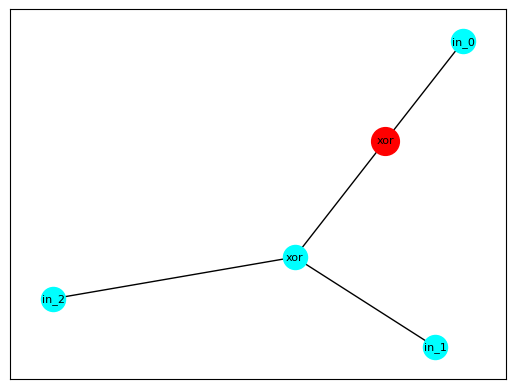

In [ ]:
parity_problem()